# Importing Packages

In [82]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Downloaded CSV Files

In [83]:
# There are two CSV files obtained from Kaggle - Olympics Athlete information & the regions to that coincide with the athletes.
# Using Pandas CSV file read code to import

athlete = pd.read_csv(r"C:\Users\Chris\Desktop\UCDPA_ChrisBuckley\athlete_events_all.csv")
regions = pd.read_csv(r"C:\Users\Chris\Desktop\UCDPA_ChrisBuckley\noc_regions_all.csv")


# Checking Imported Data

## Function 

In [84]:
# This is a function that I would normally use to quickly see the "DataFrame", "Info","Shape","Head","Tail" of the imported dataframe.

In [85]:
def df_info(df,head = 10):
    print("<--------------DATAFRAME-------------->")
    print(df)
    print("<--------------INFO-------------->")
    print(df.info)
    print("<--------------SHAPE-------------->")
    print(df.shape)
    print("<--------------HEAD-------------->")
    print(df.head)
    print("<--------------TAIL-------------->")
    print(df.tail)
   

In [86]:
df_info(athlete)

<--------------DATAFRAME-------------->
            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  199

## Athlete

In [87]:
athlete
# See how the data frame looks

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

In [88]:
athlete.shape
# We have 27116 rows and 15 columns

(271116, 15)

In [89]:
athlete.info()
# Get some information on the data frame.
# There seem to be 271116 entries and "Age", "Height", "Weight" and "Medal" seem to have some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [90]:
athlete.head(10)
# Looking at the first 10 entries we can confirm that there are some missing values in "Height", "Weight" & "Medal". We can assume that medal is correct as only 3 athletes from each event can win a medal.

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer       London           Judo   
2  DEN  1920 Summer  1920  Summer    Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
7  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
8  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   
9  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   

                                Event Medal  
0         Basketball Men's Basketball   NaN  
1        Judo Men's Extra-Lightweight   NaN  
2             Football Men's Football   NaN  
3         Tug-Of-War Men's Tug-Of-War  Gold  
4    Speed Skating Women's 500 metres   NaN  
5  Speed Skating Women's 1,000 metres   NaN  
6    Speed Skating Women's 500 metres   NaN  
7  Speed Skating Women's 1,000 metres   NaN  
8    Speed Skating Women's 500 metres   NaN  
9  Speed Skating Women's 1,000 metres   NaN

In [91]:
athlete.tail()
# Look at the last 5 entries for any other issues.
# We can see that there are some duplicates in the "ID" column. From first glance, this appears that the atheletes are assigned a particular "ID" and if they compete in different events or olympics throughout the years, they keep the same "ID" number

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [92]:
athlete.isnull().sum()
# As seen above we have some missing values.

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [12]:
athlete.describe()
# Looking at the decription of the values from the data frame -
# The min age of an athlete is 10 years old. Goole confirmed this to be true.


ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [13]:
dupilcates = athlete[athlete.duplicated("ID")]
# This variable confirms the suspician of athletes keeping the same "ID" and competing in different Olympics or events.

In [14]:
dupilcates

ID                          Name Sex   Age  Height  Weight  \
5            5      Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5      Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5      Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5      Christine Jacoba Aaftink   F  27.0   185.0    82.0   
9            5      Christine Jacoba Aaftink   F  27.0   185.0    82.0   
...        ...                           ...  ..   ...     ...     ...   
271103  135563     Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271113  135570                      Piotr ya   M  27.0   176.0    59.0   
271115  135571            Tomasz Ireneusz ya   M  34.0   185.0    96.0   

               Team  NOC        Games  Year  Season            City  \
5       Netherlands  NED  1988 Winter  1988  Winter         Calgary   
6       Netherlands  NED  1992 Winter  1992  Winter     Albertville   
7       Netherlands  NED  1992 Winter  1992  Winter     Albertville   
8       Netherlands  NED  1994 Winter  1994  Winter     Lillehammer   
9       Netherlands  NED  1994 Winter  1994  Winter     Lillehammer   
...             ...  ...          ...   ...     ...             ...   
271103       Russia  RUS  2004 Summer  2004  Summer          Athina   
271106    Argentina  ARG  2004 Summer  2004  Summer          Athina   
271109       Russia  RUS  2004 Summer  2004  Summer          Athina   
271113       Poland  POL  2014 Winter  2014  Winter           Sochi   
271115       Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                   Event   Medal  
5       Speed Skating      Speed Skating Women's 1,000 metres     NaN  
6       Speed Skating        Speed Skating Women's 500 metres     NaN  
7       Speed Skating      Speed Skating Women's 1,000 metres     NaN  
8       Speed Skating        Speed Skating Women's 500 metres     NaN  
9       Speed Skating      Speed Skating Women's 1,000 metres     NaN  
...               ...                                     ...     ...  
271103      Athletics  Athletics Women's 4 x 400 metres Relay  Silver  
271106         Hockey                     Hockey Men's Hockey     NaN  
271109         Rowing  Rowing Men's Lightweight Coxless Fours     NaN  
271113    Ski Jumping      Ski Jumping Men's Large Hill, Team     NaN  
271115      Bobsleigh                    Bobsleigh Men's Four     NaN  

[135545 rows x 15 columns]

In [15]:
duplicates = athlete.pivot_table(index=["ID"],aggfunc = "size")
# This also shows in a pivot table that there are duplicates of "ID"


In [16]:
duplicates

ID
1         1
2         1
3         1
4         1
5         6
         ..
135567    2
135568    1
135569    1
135570    2
135571    2
Length: 135571, dtype: int64

## Regions

In [17]:
regions

NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]

In [18]:
regions.info()
# We can see the "regions" data frame has 230 entries/rows and 3 columns. 
# There are also some apparent missing values from the "region" & "notes" columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [19]:
regions.shape
# Confirming the 230 rows and 3 columns

(230, 3)

In [20]:
regions.head(10)
# The first 10 entries of the data frame confirm missing values in the "notes" column

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
5  ANG       Angola                   NaN
6  ANT      Antigua   Antigua and Barbuda
7  ANZ    Australia           Australasia
8  ARG    Argentina                   NaN
9  ARM      Armenia                   NaN

In [21]:
regions.tail(10)
# The last 10 entries also show missing values in "notes"

NOC         region                   notes
220  VIE        Vietnam                     NaN
221  VIN  Saint Vincent                     NaN
222  VNM        Vietnam                     NaN
223  WIF       Trinidad  West Indies Federation
224  YAR          Yemen             North Yemen
225  YEM          Yemen                     NaN
226  YMD          Yemen             South Yemen
227  YUG         Serbia              Yugoslavia
228  ZAM         Zambia                     NaN
229  ZIM       Zimbabwe                     NaN

In [22]:
regions.isnull().sum()
# Calculating the total missing values per column

NOC         0
region      3
notes     209
dtype: int64

In [23]:
regions[regions["region"].isnull()]
# We can see that there are three specific missing values in "region" as shown above on previous line.

NOC region                 notes
168  ROT    NaN  Refugee Olympic Team
208  TUV    NaN                Tuvalu
213  UNK    NaN               Unknown

# Cleaning & Verifying


In [24]:
athlete = athlete[athlete["Season"]=="Summer"]
athlete
# Due to the size of the data set. The "winter" games have been removed to allow for a smaller data set.

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
271106  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
26         Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
271106       Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107   United States  USA  1972 Summer  1972  Summer          Munich   
271108          Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109          Russia  RUS  2004 Summer  2004  Summer          Athina   
271110         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
0       Basketball             Basketball Men's Basketball   NaN  
1             Judo            Judo Men's Extra-Lightweight   NaN  
2         Football                 Football Men's Football   NaN  
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold  
26       Athletics            Athletics Women's 100 metres   NaN  
...            ...                                     ...   ...  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN  

[222552 rows x 15 columns]

In [25]:
athlete["Medal"] = athlete["Medal"].fillna("No Medal")
# As above, only 3 athletes can obtain a medal per event. The missing values in this column will be filled with "No Medal" to allow analysis and not to have missing values.

C:\Users\Chris\AppData\Local\Temp\ipykernel_840928\1351202481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete["Medal"] = athlete["Medal"].fillna("No Medal")


In [26]:
athlete
# Check to see if the "NaN" values changed.

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
271106  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
26         Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
271106       Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107   United States  USA  1972 Summer  1972  Summer          Munich   
271108          Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109          Russia  RUS  2004 Summer  2004  Summer          Athina   
271110         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event     Medal  
0       Basketball             Basketball Men's Basketball  No Medal  
1             Judo            Judo Men's Extra-Lightweight  No Medal  
2         Football                 Football Men's Football  No Medal  
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War      Gold  
26       Athletics            Athletics Women's 100 metres  No Medal  
...            ...                                     ...       ...  
271106      Hockey                     Hockey Men's Hockey  No Medal  
271107    Football                 Football Men's Football  No Medal  
271108      Rowing  Rowing Men's Lightweight Coxless Fours  No Medal  
271109      Rowing  Rowing Men's Lightweight Coxless Fours  No Medal  
271110  Basketball           Basketball Women's Basketball  No Medal  

[222552 rows x 15 columns]

In [27]:
# The next few lines of code was an attempt to fill in the missing values for "Height", "Weight" & "Age" from the Athlete dataset.
# The thought process was to take all male athletes and find the mean for each column and similarly for the females.
# I would have liked to have found a more elegent way of doing this.

In [28]:
male_weight = athlete[athlete["Sex"] =="M"]["Weight"].mean()

In [29]:
athlete["Weight"].fillna(value=male_weight, inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_840928\3950820616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete["Weight"].fillna(value=male_weight, inplace=True)


In [30]:
fmale_weight = athlete[athlete["Sex"] =="F"]["Weight"].mean()

In [31]:
athlete["Weight"].fillna(value=fmale_weight, inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_840928\3296033824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete["Weight"].fillna(value=fmale_weight, inplace=True)


In [32]:
male_height = athlete[athlete["Sex"] =="M"]["Height"].mean()

In [33]:
athlete["Height"].fillna(value=male_height, inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_840928\2169327546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete["Height"].fillna(value=male_height, inplace=True)


In [34]:
fmale_height = athlete[athlete["Sex"] =="F"]["Height"].mean()

In [35]:
athlete["Height"].fillna(value=fmale_height, inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_840928\142533760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete["Height"].fillna(value=fmale_height, inplace=True)


In [36]:
male_age = athlete[athlete["Sex"] =="M"]["Age"].mean()

In [37]:
athlete["Age"].fillna(value=male_age, inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_840928\3638968547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete["Age"].fillna(value=male_age, inplace=True)


In [38]:
fmale_age = athlete[athlete["Sex"] =="F"]["Age"].mean()

In [39]:
athlete["Age"].fillna(value=fmale_age, inplace=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_840928\925307059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete["Age"].fillna(value=fmale_age, inplace=True)


In [40]:
athlete.isnull().sum()
# We now have no missing data in the "Athlete" data set

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [41]:
regions.isnull().sum()
# Showing the count of missing values in the "region" data set

NOC         0
region      3
notes     209
dtype: int64

In [42]:
regions[regions["region"].isnull()]

NOC region                 notes
168  ROT    NaN  Refugee Olympic Team
208  TUV    NaN                Tuvalu
213  UNK    NaN               Unknown

In [43]:
regions.loc[208,"region"] = "Tuvalu"
# Google provided that the "NOC" (National Olympics Committee) for "TUV" is "Tuvalu".
# Code infills the missing value to "Tuvalu"

In [44]:
regions[regions["region"].isnull()]
# Google provided that the "ROT" (Refugee Olympic Team) has athletes that vary from regions/countries.
# "UNK" could not be found on the internet for it's region.

NOC region                 notes
168  ROT    NaN  Refugee Olympic Team
213  UNK    NaN               Unknown

In [45]:
regions.drop("notes", axis=1, inplace = True)
#The "note" column provided no benefit to the assignment or analysis and was dropped

In [46]:
regions

NOC       region
0    AFG  Afghanistan
1    AHO      Curacao
2    ALB      Albania
3    ALG      Algeria
4    AND      Andorra
..   ...          ...
225  YEM        Yemen
226  YMD        Yemen
227  YUG       Serbia
228  ZAM       Zambia
229  ZIM     Zimbabwe

[230 rows x 2 columns]

In [47]:
regions["region"].fillna(value = "Unknown", inplace = True)
# The two regions with missing values were changed to "Unknown" to allow for analysis later.

In [48]:
regions[regions["region"].isnull()]
# Showing that all regions have data

Empty DataFrame
Columns: [NOC, region]
Index: []

# Merging Data 

In [49]:
df = athlete.merge(regions, on="NOC", how = "left")
# The "Athlete" & "Regions" data sets are to be merged using the "NOC" column with a left merge. The "NOC" column is common to both data sets.

In [50]:
df
# Checking that the merge was successful.

ID                                Name Sex   Age      Height  \
0            1                           A Dijiang   M  24.0  180.000000   
1            2                            A Lamusi   M  23.0  170.000000   
2            3                 Gunnar Nielsen Aaby   M  24.0  178.901874   
3            4                Edgar Lindenau Aabye   M  34.0  178.901874   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0  168.000000   
...        ...                                 ...  ..   ...         ...   
222547  135565            Fernando scar Zylberberg   M  27.0  168.000000   
222548  135566          James Francis "Jim" Zylker   M  21.0  175.000000   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0  183.000000   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0  183.000000   
222551  135568              Olga Igorevna Zyuzkova   F  33.0  171.000000   

           Weight            Team  NOC        Games  Year  Season  \
0       80.000000           China  CHN  1992 Summer  1992  Summer   
1       60.000000           China  CHN  2012 Summer  2012  Summer   
2       75.604195         Denmark  DEN  1920 Summer  1920  Summer   
3       75.604195  Denmark/Sweden  DEN  1900 Summer  1900  Summer   
4       75.604195     Netherlands  NED  1932 Summer  1932  Summer   
...           ...             ...  ...          ...   ...     ...   
222547  76.000000       Argentina  ARG  2004 Summer  2004  Summer   
222548  75.000000   United States  USA  1972 Summer  1972  Summer   
222549  72.000000          Russia  RUS  2000 Summer  2000  Summer   
222550  72.000000          Russia  RUS  2004 Summer  2004  Summer   
222551  69.000000         Belarus  BLR  2016 Summer  2016  Summer   

                  City       Sport                                   Event  \
0            Barcelona  Basketball             Basketball Men's Basketball   
1               London        Judo            Judo Men's Extra-Lightweight   
2            Antwerpen    Football                 Football Men's Football   
3                Paris  Tug-Of-War             Tug-Of-War Men's Tug-Of-War   
4          Los Angeles   Athletics            Athletics Women's 100 metres   
...                ...         ...                                     ...   
222547          Athina      Hockey                     Hockey Men's Hockey   
222548          Munich    Football                 Football Men's Football   
222549          Sydney      Rowing  Rowing Men's Lightweight Coxless Fours   
222550          Athina      Rowing  Rowing Men's Lightweight Coxless Fours   
222551  Rio de Janeiro  Basketball           Basketball Women's Basketball   

           Medal       region  
0       No Medal        China  
1       No Medal        China  
2       No Medal      Denmark  
3           Gold      Denmark  
4       No Medal  Netherlands  
...          ...          ...  
222547  No Medal    Argentina  
222548  No Medal          USA  
222549  No Medal       Russia  
222550  No Medal       Russia  
222551  No Medal      Belarus  

[222552 rows x 16 columns]

In [51]:
df.isnull().sum()
# Checking for missing values after the merge.

ID          0
Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
region    349
dtype: int64

In [52]:
df[df["region"].isnull()]
#Checking the values in the "region" column for missing values

ID                             Name Sex   Age      Height  \
509        332                 Zarinah Abdullah   F  21.0  178.901874   
510        332                 Zarinah Abdullah   F  25.0  178.901874   
2362      1515  Saiyidah Aisyah Mohamed Rafa'ee   F  28.0  173.000000   
6652      4264                   Ang Peng Siong   M  21.0  180.000000   
6653      4264                   Ang Peng Siong   M  21.0  180.000000   
...        ...                              ...  ..   ...         ...   
220770  134454                    Zhang Guirong   F  26.0  182.000000   
220771  134454                    Zhang Guirong   F  30.0  182.000000   
220972  134587                    Zhang Xueling   F  21.0  163.000000   
220973  134587                    Zhang Xueling   F  21.0  163.000000   
221349  134826                       Zhou Yihan   F  22.0  168.000000   

           Weight         Team  NOC        Games  Year  Season  \
509     75.604195    Singapore  SGP  1992 Summer  1992  Summer   
510     75.604195    Singapore  SGP  1996 Summer  1996  Summer   
2362    68.000000    Singapore  SGP  2016 Summer  2016  Summer   
6652    75.000000    Singapore  SGP  1984 Summer  1984  Summer   
6653    75.000000    Singapore  SGP  1984 Summer  1984  Summer   
...           ...          ...  ...          ...   ...     ...   
220770  95.000000    Singapore  SGP  2004 Summer  2004  Summer   
220771  95.000000    Singapore  SGP  2008 Summer  2008  Summer   
220972  53.000000    Singapore  SGP  2004 Summer  2004  Summer   
220973  53.000000  Singapore-1  SGP  2004 Summer  2004  Summer   
221349  54.000000    Singapore  SGP  2016 Summer  2016  Summer   

                  City         Sport  \
509          Barcelona     Badminton   
510            Atlanta     Badminton   
2362    Rio de Janeiro        Rowing   
6652       Los Angeles      Swimming   
6653       Los Angeles      Swimming   
...                ...           ...   
220770          Athina     Athletics   
220771         Beijing     Athletics   
220972          Athina  Table Tennis   
220973          Athina  Table Tennis   
221349  Rio de Janeiro  Table Tennis   

                                                Event     Medal region  
509                         Badminton Women's Singles  No Medal    NaN  
510                         Badminton Women's Singles  No Medal    NaN  
2362                     Rowing Women's Single Sculls  No Medal    NaN  
6652              Swimming Men's 100 metres Freestyle  No Medal    NaN  
6653    Swimming Men's 4 x 100 metres Freestyle Relay  No Medal    NaN  
...                                               ...       ...    ...  
220770                     Athletics Women's Shot Put  No Medal    NaN  
220771                     Athletics Women's Shot Put  No Medal    NaN  
220972                   Table Tennis Women's Singles  No Medal    NaN  
220973                   Table Tennis Women's Doubles  No Medal    NaN  
221349                      Table Tennis Women's Team  No Medal    NaN  

[349 rows x 16 columns]

In [53]:
SGP = "Singapore"
# Variable to allow imputing of missing values for "NOC == SGP"

In [54]:
df["region"].fillna(value=SGP, inplace=True)
# Imputing missing values for "NOC" == "SGP"

In [55]:
df[df["region"].isnull()]
# Checking for missing values

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal, region]
Index: []

In [56]:
#df.loc[269455]
# Checking the last index in the table to see if the missing value in "region" was changed to "Singapore"

In [57]:
df
# Final check on the dataframe

ID                                Name Sex   Age      Height  \
0            1                           A Dijiang   M  24.0  180.000000   
1            2                            A Lamusi   M  23.0  170.000000   
2            3                 Gunnar Nielsen Aaby   M  24.0  178.901874   
3            4                Edgar Lindenau Aabye   M  34.0  178.901874   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0  168.000000   
...        ...                                 ...  ..   ...         ...   
222547  135565            Fernando scar Zylberberg   M  27.0  168.000000   
222548  135566          James Francis "Jim" Zylker   M  21.0  175.000000   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0  183.000000   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0  183.000000   
222551  135568              Olga Igorevna Zyuzkova   F  33.0  171.000000   

           Weight            Team  NOC        Games  Year  Season  \
0       80.000000           China  CHN  1992 Summer  1992  Summer   
1       60.000000           China  CHN  2012 Summer  2012  Summer   
2       75.604195         Denmark  DEN  1920 Summer  1920  Summer   
3       75.604195  Denmark/Sweden  DEN  1900 Summer  1900  Summer   
4       75.604195     Netherlands  NED  1932 Summer  1932  Summer   
...           ...             ...  ...          ...   ...     ...   
222547  76.000000       Argentina  ARG  2004 Summer  2004  Summer   
222548  75.000000   United States  USA  1972 Summer  1972  Summer   
222549  72.000000          Russia  RUS  2000 Summer  2000  Summer   
222550  72.000000          Russia  RUS  2004 Summer  2004  Summer   
222551  69.000000         Belarus  BLR  2016 Summer  2016  Summer   

                  City       Sport                                   Event  \
0            Barcelona  Basketball             Basketball Men's Basketball   
1               London        Judo            Judo Men's Extra-Lightweight   
2            Antwerpen    Football                 Football Men's Football   
3                Paris  Tug-Of-War             Tug-Of-War Men's Tug-Of-War   
4          Los Angeles   Athletics            Athletics Women's 100 metres   
...                ...         ...                                     ...   
222547          Athina      Hockey                     Hockey Men's Hockey   
222548          Munich    Football                 Football Men's Football   
222549          Sydney      Rowing  Rowing Men's Lightweight Coxless Fours   
222550          Athina      Rowing  Rowing Men's Lightweight Coxless Fours   
222551  Rio de Janeiro  Basketball           Basketball Women's Basketball   

           Medal       region  
0       No Medal        China  
1       No Medal        China  
2       No Medal      Denmark  
3           Gold      Denmark  
4       No Medal  Netherlands  
...          ...          ...  
222547  No Medal    Argentina  
222548  No Medal          USA  
222549  No Medal       Russia  
222550  No Medal       Russia  
222551  No Medal      Belarus  

[222552 rows x 16 columns]

In [58]:
df.isnull().sum()
# Confirmed that no missing values remain before analysis & visualisation

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

# Analysis & Visualisation

## Top 10 Participating Countries

In [59]:
# Discover which countries have participated the most

In [60]:
top_10 = df.Team.value_counts().sort_values(ascending=False).head(10)


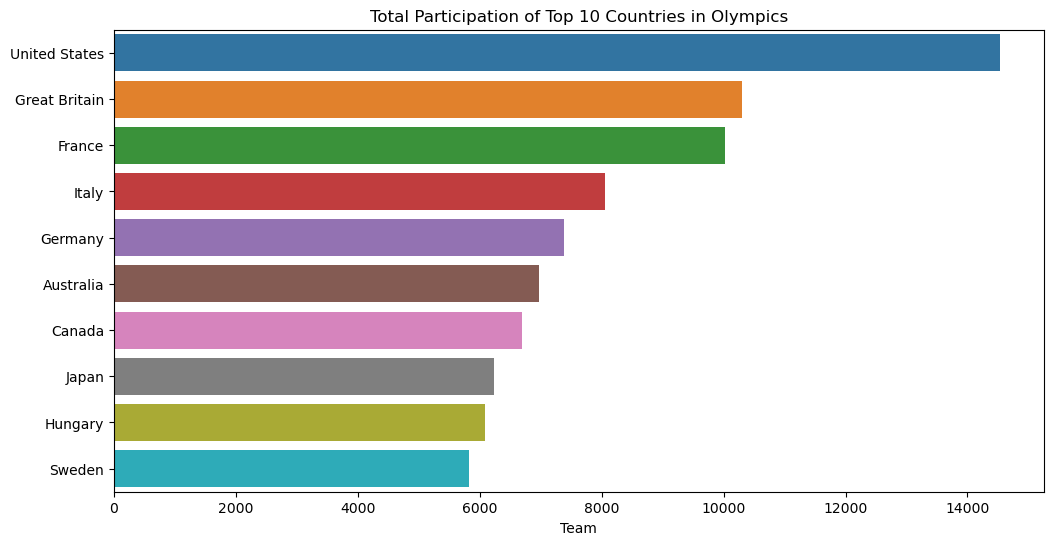

In [61]:
plt.figure(figsize=(12,6))
plt.title('Total Participation of Top 10 Countries in Olympics')
sns.barplot(x=top_10, y=top_10.index);

##  Top 10 Countries by number of Gold Medals

In [62]:
medals = df[df["Medal"]=="Gold"]
# Filter the merged data frame to only show gold medalists

In [63]:
medals
# Check that the filtering worked

ID                                 Name Sex   Age      Height  \
3            4                 Edgar Lindenau Aabye   M  34.0  178.901874   
16          17              Paavo Johannes Aaltonen   M  28.0  175.000000   
18          17              Paavo Johannes Aaltonen   M  28.0  175.000000   
22          17              Paavo Johannes Aaltonen   M  28.0  175.000000   
33          21            Ragnhild Margrethe Aamodt   F  27.0  163.000000   
...        ...                                  ...  ..   ...         ...   
222463  135503                      Zurab Zviadauri   M  23.0  182.000000   
222485  135520                          Julia Zwehl   F  28.0  167.000000   
222492  135523       Ronald Ferdinand "Ron" Zwerver   M  29.0  200.000000   
222519  135545                      Henk Jan Zwolle   M  31.0  197.000000   
222526  135553  Galina Ivanovna Zybina (-Fyodorova)   F  21.0  168.000000   

           Weight            Team  NOC        Games  Year  Season      City  \
3       75.604195  Denmark/Sweden  DEN  1900 Summer  1900  Summer     Paris   
16      64.000000         Finland  FIN  1948 Summer  1948  Summer    London   
18      64.000000         Finland  FIN  1948 Summer  1948  Summer    London   
22      64.000000         Finland  FIN  1948 Summer  1948  Summer    London   
33      75.604195          Norway  NOR  2008 Summer  2008  Summer   Beijing   
...           ...             ...  ...          ...   ...     ...       ...   
222463  90.000000         Georgia  GEO  2004 Summer  2004  Summer    Athina   
222485  60.000000         Germany  GER  2004 Summer  2004  Summer    Athina   
222492  93.000000     Netherlands  NED  1996 Summer  1996  Summer   Atlanta   
222519  93.000000     Netherlands  NED  1996 Summer  1996  Summer   Atlanta   
222526  80.000000    Soviet Union  URS  1952 Summer  1952  Summer  Helsinki   

             Sport                             Event Medal       region  
3       Tug-Of-War       Tug-Of-War Men's Tug-Of-War  Gold      Denmark  
16      Gymnastics  Gymnastics Men's Team All-Around  Gold      Finland  
18      Gymnastics      Gymnastics Men's Horse Vault  Gold      Finland  
22      Gymnastics  Gymnastics Men's Pommelled Horse  Gold      Finland  
33        Handball         Handball Women's Handball  Gold       Norway  
...            ...                               ...   ...          ...  
222463        Judo           Judo Men's Middleweight  Gold      Georgia  
222485      Hockey             Hockey Women's Hockey  Gold      Germany  
222492  Volleyball       Volleyball Men's Volleyball  Gold  Netherlands  
222519      Rowing         Rowing Men's Coxed Eights  Gold  Netherlands  
222526   Athletics        Athletics Women's Shot Put  Gold       Russia  

[11459 rows x 16 columns]

In [64]:
med10 = medals.region.value_counts().reset_index(name="Medal").head(10)
# Creating a new dataframe to count the total amount of gold medals earned and sorting with the most at the top. The index will be reset to 0.


In [65]:
med10.rename(columns = {"index":"Country","Medal":"Medal Count"}, inplace = True)
med10

Country  Medal Count
0        USA         2472
1     Russia         1220
2    Germany         1075
3         UK          636
4      Italy          518
5     France          465
6    Hungary          432
7  Australia          362
8     Sweden          354
9      China          335

<AxesSubplot:title={'center':'Countries with the most gold medals'}, xlabel='Country', ylabel='Medal Count'>

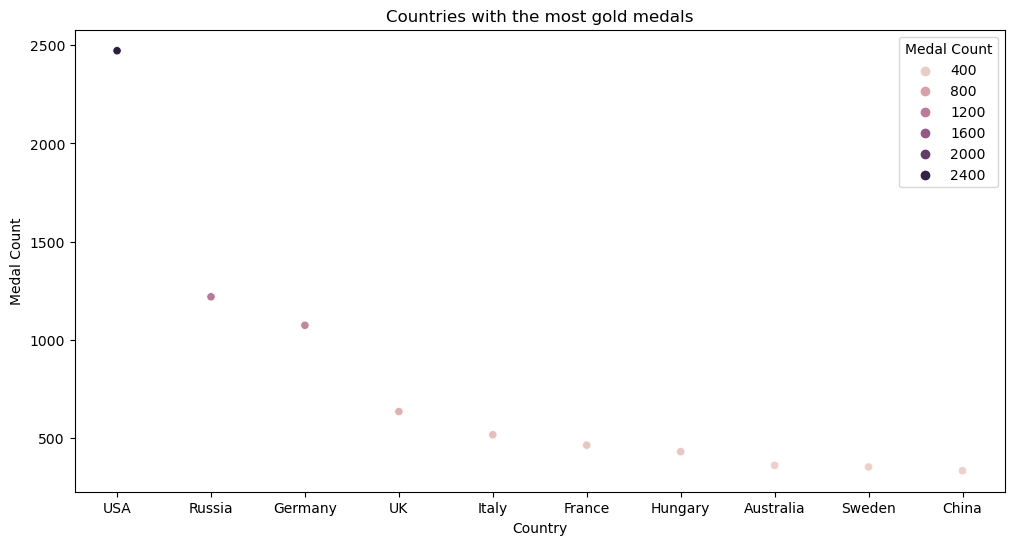

In [66]:
plt.figure(figsize=(12,6))
plt.title('Countries with the most gold medals')
sns.scatterplot(x='Country',y='Medal Count', data=med10, hue = "Medal Count")

# Scatter plot to show the medal country using the "Country" on the x axis and "Medal Count" on the y axis. The medal count is shown in different colours

In [67]:
# Scraping the "Olympics Medal Count 2021" from a website using BeautifulSoup


In [68]:
table = requests.get("https://www.bbc.com/sport/olympics/57836709")
gold = bs(table.content, "lxml")

# Using BeautifulSoup to get a request to the URL


In [69]:
table = gold.find("table", {"class":"gs-o-table story-body__table"}) 

# Using BeautifulSoup's find function on the website element

In [70]:
pd.read_html(str(table))[0]
# Using pandas "html read" function to return the table in a pandas data frame

Rank        Country  Gold  Silver  Bronze  Total
0      1  United States    39      41      33    113
1      2          China    38      32      18     88
2      3          Japan    27      14      17     58
3      4  Great Britain    22      21      22     65
4      5            ROC    20      28      23     71
..   ...            ...   ...     ...     ...    ...
88    86          Ghana     0       0       1      1
89    86        Grenada     0       0       1      1
90    86         Kuwait     0       0       1      1
91    86        Moldova     0       0       1      1
92    86          Syria     0       0       1      1

[93 rows x 6 columns]

# Events with greatest medal count

In [71]:
event = df.Event.value_counts().reset_index(name="Medal").head(10)
event.rename(columns = {"index":"Event","Medal":"Medal Count"}, inplace = True)
# The "event" variable is filtering the merged dataframe to show the events with the most medals over the whole dataset

In [72]:
event
# Returning a visual check

Event  Medal Count
0                 Football Men's Football         5733
1                     Hockey Men's Hockey         3958
2             Water Polo Men's Water Polo         3358
3             Basketball Men's Basketball         3280
4     Cycling Men's Road Race, Individual         2947
5  Gymnastics Men's Individual All-Around         2500
6               Rowing Men's Coxed Eights         2423
7        Gymnastics Men's Team All-Around         2411
8                 Handball Men's Handball         2264
9                Athletics Men's Marathon         2093

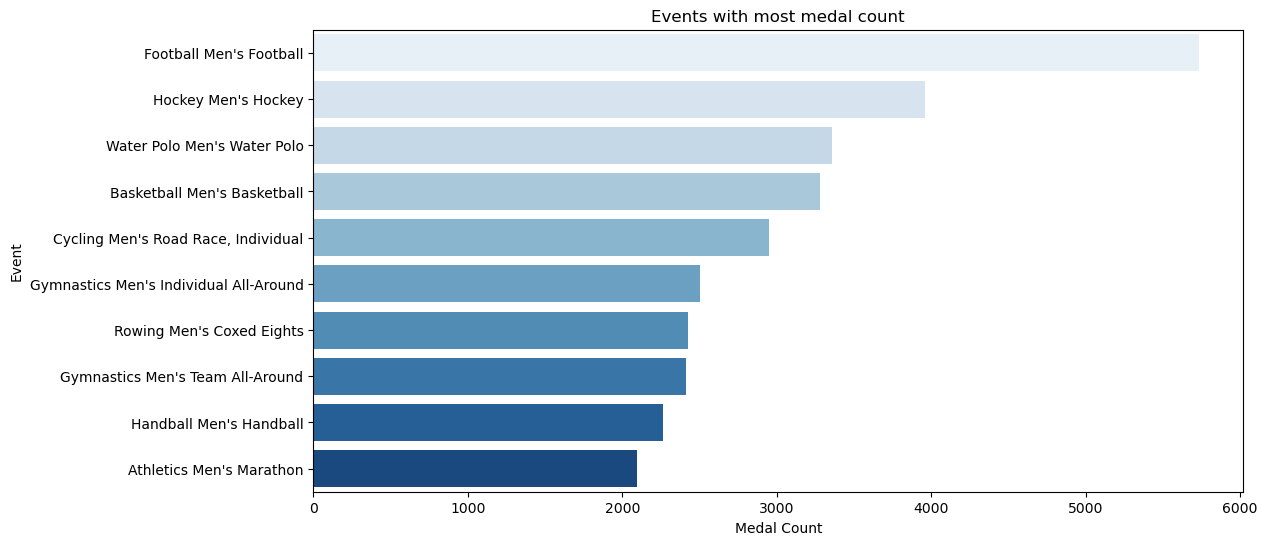

In [73]:
plt.figure(figsize=(12,6))
plt.title('Events with most medal count')
sns.barplot(x="Medal Count", y = "Event", data = event, palette = "Blues");
#sns.scatterplot(x="Event", y = "Medal Count", data = event, palette = "Blues")

# The horizontal barplot uses the event table above to show the top 10 events with the most medals. Originally I wanted to use a scatterplot, but I thought a bar plot was easier to visualize.

# Height vs Weight for Medalists

In [74]:
medalist = df[df["Medal"] == "Gold"]

# Creating a new variable to filter out gold medalists


In [75]:
medalist

#Visual check

ID                                 Name Sex   Age      Height  \
3            4                 Edgar Lindenau Aabye   M  34.0  178.901874   
16          17              Paavo Johannes Aaltonen   M  28.0  175.000000   
18          17              Paavo Johannes Aaltonen   M  28.0  175.000000   
22          17              Paavo Johannes Aaltonen   M  28.0  175.000000   
33          21            Ragnhild Margrethe Aamodt   F  27.0  163.000000   
...        ...                                  ...  ..   ...         ...   
222463  135503                      Zurab Zviadauri   M  23.0  182.000000   
222485  135520                          Julia Zwehl   F  28.0  167.000000   
222492  135523       Ronald Ferdinand "Ron" Zwerver   M  29.0  200.000000   
222519  135545                      Henk Jan Zwolle   M  31.0  197.000000   
222526  135553  Galina Ivanovna Zybina (-Fyodorova)   F  21.0  168.000000   

           Weight            Team  NOC        Games  Year  Season      City  \
3       75.604195  Denmark/Sweden  DEN  1900 Summer  1900  Summer     Paris   
16      64.000000         Finland  FIN  1948 Summer  1948  Summer    London   
18      64.000000         Finland  FIN  1948 Summer  1948  Summer    London   
22      64.000000         Finland  FIN  1948 Summer  1948  Summer    London   
33      75.604195          Norway  NOR  2008 Summer  2008  Summer   Beijing   
...           ...             ...  ...          ...   ...     ...       ...   
222463  90.000000         Georgia  GEO  2004 Summer  2004  Summer    Athina   
222485  60.000000         Germany  GER  2004 Summer  2004  Summer    Athina   
222492  93.000000     Netherlands  NED  1996 Summer  1996  Summer   Atlanta   
222519  93.000000     Netherlands  NED  1996 Summer  1996  Summer   Atlanta   
222526  80.000000    Soviet Union  URS  1952 Summer  1952  Summer  Helsinki   

             Sport                             Event Medal       region  
3       Tug-Of-War       Tug-Of-War Men's Tug-Of-War  Gold      Denmark  
16      Gymnastics  Gymnastics Men's Team All-Around  Gold      Finland  
18      Gymnastics      Gymnastics Men's Horse Vault  Gold      Finland  
22      Gymnastics  Gymnastics Men's Pommelled Horse  Gold      Finland  
33        Handball         Handball Women's Handball  Gold       Norway  
...            ...                               ...   ...          ...  
222463        Judo           Judo Men's Middleweight  Gold      Georgia  
222485      Hockey             Hockey Women's Hockey  Gold      Germany  
222492  Volleyball       Volleyball Men's Volleyball  Gold  Netherlands  
222519      Rowing         Rowing Men's Coxed Eights  Gold  Netherlands  
222526   Athletics        Athletics Women's Shot Put  Gold       Russia  

[11459 rows x 16 columns]

Text(0.5, 1.0, 'Height vs Age in Olympic Gold Medalists')

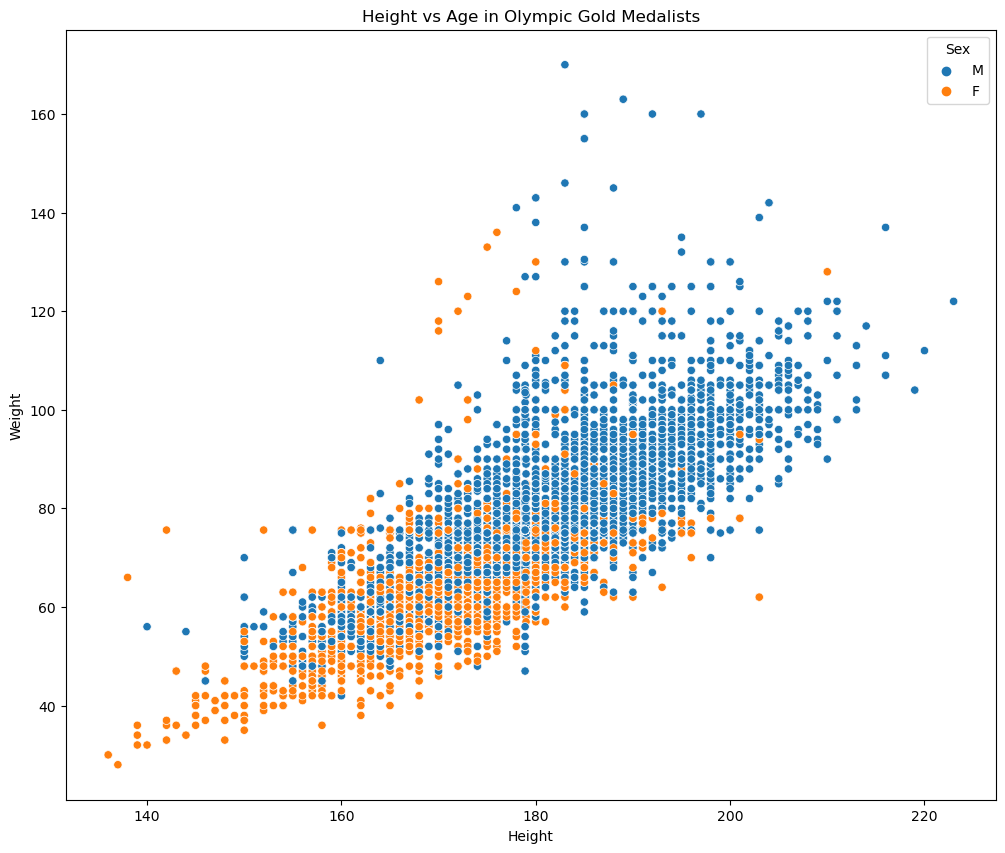

In [76]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x="Height", y="Weight", hue = "Sex", data=medalist,)
plt.title("Height vs Age in Olympic Gold Medalists")

# Scatter plot to show "height" vs "weight" for every gold medalist. The colour of the dots shows the different sexes. Blue for male and orange for female.

# Is there any relationships between all of the data?

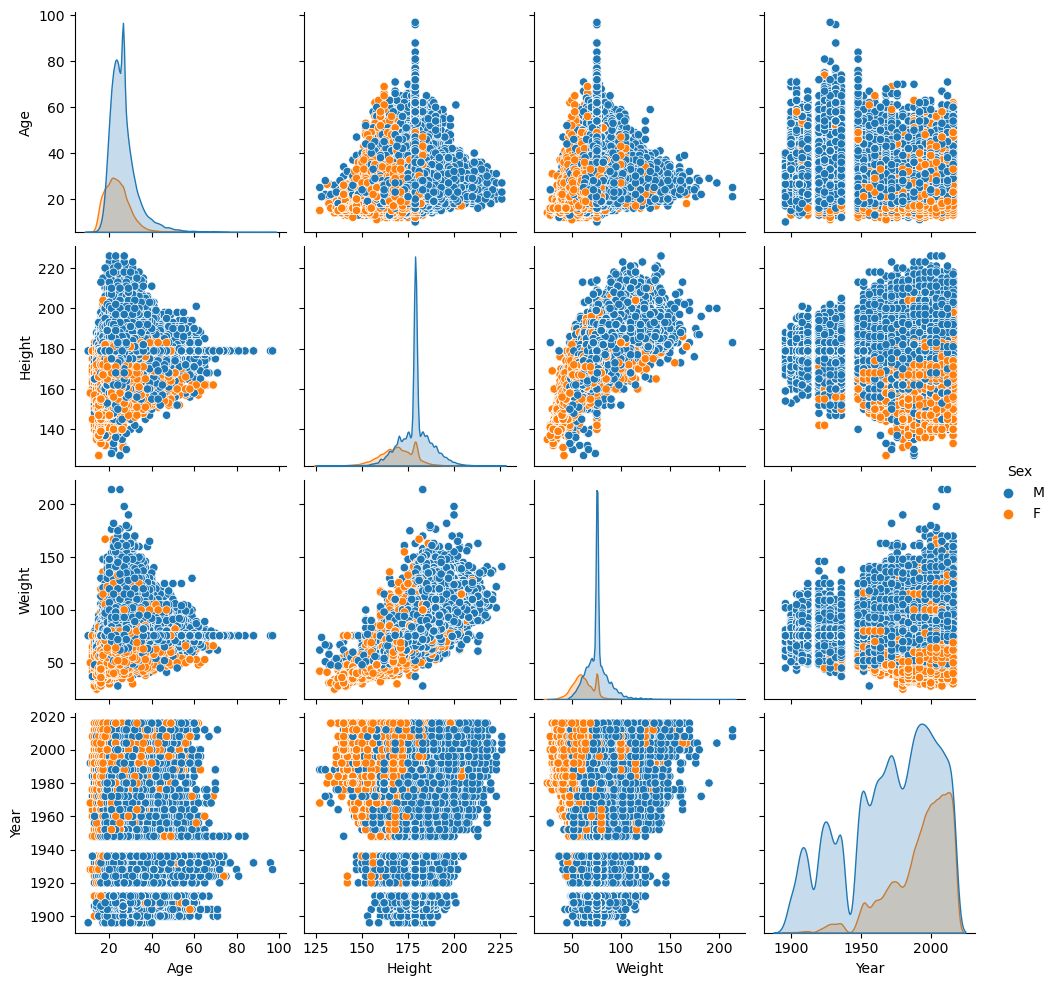

In [77]:
sns.pairplot(df,vars = ["Age","Height","Weight","Year"], hue="Sex")

# This pairplot was used to see if there was any relationships or trends in the data.

# The "ID" column was removed as it provided no useful information